##0) Definición de funciones

In [ ]:
def log_transform(x):
    return np.log(x + 1)

# Lectura de datos

Llamamos a las librerias que vamos a usar

In [ ]:
import pandas as pd
import sklearn as sk
import numpy as np
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

"""para importar datos de drive"""
#from google.colab import drive
#from google.colab import files
#drive.mount('/content/drive')

'para importar datos de drive'

Abrimos la base de entrenamiento y de prueba

In [ ]:
df_entrenamiento = pd.read_excel('/content/udemy_entrenamiento.xlsx', index_col="id",
                                 parse_dates=["created_date",'published_date','last_update_date'], na_values="")#, na_values= le ponemos como aparecen los nas
df_prueba = pd.read_excel('/content/udemy_prueba.xlsx', index_col="id", 
                          parse_dates=["created_date",'published_date','last_update_date'])
df_prueba.head()
df_entrenamiento.head()
# print(df_prueba.info())

df_entrenamiento.columns
# print(df_entrenamiento["bestseller"].value_counts())
# print(df_entrenamiento["captions"].value_counts())
# print(df_entrenamiento["locale"].value_counts())
# print(df_entrenamiento["category"].value_counts())
# print(df_entrenamiento["instructional_level_simple"].value_counts())

"""buscamos duplicados (en el de entrenamiento) y los sacamos"""

df_entrenamiento=df_entrenamiento.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
df_entrenamiento.shape

(11034, 20)

In [ ]:
df_prueba.columns

Index(['title', 'headline', 'is_practice_test_course', 'bestseller',
       'captions', 'rating', 'num_published_lectures',
       'num_published_practice_tests', 'locale', 'created_date',
       'instructional_level_simple', 'published_date', 'last_update_date',
       'content_info_short', 'instructors', 'category', 'subcategory',
       'objectives', 'list_price', 'discount_price'],
      dtype='object')

Se buscan duplicados por el titulo y encabezado del curso

In [ ]:
df_entrenamiento[df_entrenamiento.duplicated(subset = ["title", "headline"], keep=False)]

,title,headline,is_practice_test_course,bestseller,captions,rating,num_published_lectures,num_published_practice_tests,locale,created_date,instructional_level_simple,published_date,last_update_date,content_info_short,instructors,category,subcategory,objectives,list_price,discount_price
id,,,,,,,,,,,,,,,,,,,,
2125,La guía definitiva del desarrollo de videojueg...,Creada en colaboración con Unity Technologies:...,False,yes,es_LA,4.549655,168,0,es_LA,2017-10-23,Principiante,2017-12-14,2021-02-23,"13,5 horas","27674560,36995740,13463226",Desarrollo,Desarrollo de videojuegos en 2D,"Conceptos básicos de C# como variables, senten...",$89.99,$12
2126,La guía definitiva del desarrollo de videojueg...,Creada en colaboración con Unity Technologies:...,False,yes,es_LA,4.549655,168,0,es_LA,2017-10-23,Principiante,2017-12-14,2021-02-23,"13,5 horas","27674560,36995740,13463226",Desarrollo,Desarrollo de videojuegos en 2D,"Conceptos básicos de C# como variables, senten...",$94.99,$12
3587,"Elastic Stack 7. Beats, Logstash, Elasticsearc...","Búsquedas, analítica de logs y monitorización ...",False,yes,es_ES,4.659589,83,0,es_ES,2018-07-05,Todos los niveles,2018-10-08,2020-06-03,17 horas,34423718,Negocios,Elasticsearch,"Una vez finalizada la formación, los estudiant...",$89.99,$12
3588,"Elastic Stack 7. Beats, Logstash, Elasticsearc...","Búsquedas, analítica de logs y monitorización ...",False,yes,es_ES,4.659589,83,0,es_ES,2018-07-05,Todos los niveles,2018-10-08,2020-06-03,17 horas,34423718,Negocios,Elasticsearch,"Una vez finalizada la formación, los estudiant...",$94.99,$12


Se eliminan las filas duplicadas

In [ ]:
df_entrenamiento = df_entrenamiento.drop_duplicates(subset = ["title", "headline"], keep = 'first', inplace = False)
df_entrenamiento.shape

(11032, 20)

Se buscan duplicados por el titulo y encabezado del curso en el df de prueba

In [ ]:
df_prueba[df_prueba.duplicated(subset = ["title", "headline"], keep=False)]

,title,headline,is_practice_test_course,bestseller,captions,rating,num_published_lectures,num_published_practice_tests,locale,created_date,instructional_level_simple,published_date,last_update_date,content_info_short,instructors,category,subcategory,objectives,list_price,discount_price
id,,,,,,,,,,,,,,,,,,,,
11245,Aprende los Sistemas de Trading de los Grandes...,Los mejores Sistemas de Inversión creados por ...,False,NaN,es_ES,3.500000,27,0,es_ES,2021-03-20,Todos los niveles,2021-03-24,2021-03-24,2 horas,35796842,Finanzas y contabilidad,Comercio bursátil,Todos los grandes traders del mercado tienen s...,$94.99,$12
11246,Aprende los Sistemas de Trading de los Grandes...,Los mejores Sistemas de Inversión creados por ...,False,NaN,es_ES,3.500000,27,0,es_ES,2021-03-20,Todos los niveles,2021-03-24,2021-03-24,2 horas,35796842,Finanzas y contabilidad,Comercio bursátil,Todos los grandes traders del mercado tienen s...,$94.99,$12
11314,MATLAB/Simulink para Electrónica de Potencia,Aprende MATLAB/Simulink modelando dispositivos...,False,NaN,es_LA,4.775624,34,0,es_LA,2021-03-31,Todos los niveles,2021-04-06,2021-06-02,7 horas,35421218,Enseñanzas y disciplinas académicas,Simulink,Cómo simular dispositivos electrónicos de pote...,$19.99,$12
11315,MATLAB/Simulink para Electrónica de Potencia,Aprende MATLAB/Simulink modelando dispositivos...,False,NaN,es_LA,4.775624,34,0,es_LA,2021-03-31,Todos los niveles,2021-04-06,2021-06-02,7 horas,35421218,Enseñanzas y disciplinas académicas,Simulink,Cómo simular dispositivos electrónicos de pote...,$19.99,$12
11320,Lengua de señas mexicana,Curso básico completo de lengua de señas mexic...,False,NaN,es_MX,5.000000,58,0,es_MX,2021-03-31,Principiante,2021-04-16,2021-04-15,"1,5 horas",155091366,Enseñanzas y disciplinas académicas,Lenguaje de signos,Conocer y aprender la lengua de señas mexicana...,$19.99,$12
11321,Lengua de señas mexicana,Curso básico completo de lengua de señas mexic...,False,NaN,es_MX,5.000000,58,0,es_MX,2021-03-31,Principiante,2021-04-16,2021-04-15,"1,5 horas",155091366,Enseñanzas y disciplinas académicas,Lenguaje de signos,Conocer y aprender la lengua de señas mexicana...,$19.99,$12


In [ ]:
subcateg=df_prueba.subcategory.unique().tolist()
len(subcateg)

198

In [ ]:
subcateg=df_entrenamiento.subcategory.unique().tolist()
len(subcateg)

1868

In [ ]:
df_entrenamiento[df_entrenamiento['subcategory'].isin(subcateg)].shape

(11032, 20)

In [ ]:
print(df_entrenamiento.shape)
print(df_prueba.shape)

(11032, 20)
(239, 20)


In [ ]:
df = pd.concat([df_entrenamiento,df_prueba], axis=0)
df.shape

(11271, 20)

<h1> Entendimiento

<h2> Lista de cosas a entender: 

*   captions (si es na, suponemos que no tiene subtitulos)
*   last_update
* objectives
* subcategory (son solo 19, podriamos deducirlo)
* instructional level (es solo 1, podemos reemplazarlo con el nivel mas repetido)
* headline (es solo 1, formato texto)



####Antes de entender hay que ver con que nos enfrentamos.
Vamos a cambiar algunas columnas y agregar algunas otras con el fin de poder sacar información luego. Lo primero es generar un bool de la columna objetivo. Esto es solo para ver info del conjunto de entrenamiento nunca puede usarse para entrenar el modelo.
Luego pasaremos las fechas a formato fecha y los precios a formato numerico. Con el discount price hay NaN que utilizaremos el precio original para indicar que se mantiene el precio.


In [ ]:
"""reemplazamos el "yes" por si de la base de entrenamiento"""
#df_entrenamiento['bestseller'].replace('yes','si', inplace=True)
dict_map = {'yes':'si','no':'no'}
df['bestseller']=df['bestseller'].map(dict_map)
df.head()

,title,headline,is_practice_test_course,bestseller,captions,rating,num_published_lectures,num_published_practice_tests,locale,created_date,instructional_level_simple,published_date,last_update_date,content_info_short,instructors,category,subcategory,objectives,list_price,discount_price
id,,,,,,,,,,,,,,,,,,,,
1,Aprende a tocar Piano o Teclado (Desde nivel b...,Curso completo de Piano con TEORÍA para el fun...,False,no,es_LA,4.535809,58,1,es_LA,2012-01-26,Todos los niveles,2012-01-26,2021-05-19,4 horas,121211,Música,Piano,Aprende Piano desde nivel básico. Estudiaras l...,$34.99,$12
2,Curso Hipoterapia y Rehabilitacion Ecuestre On...,"Terapias asistidas por Caballos (Hipoterapia, ...",False,no,es_ES,4.133590,32,0,es_ES,2012-06-10,Principiante,2012-06-10,2015-12-17,10 horas,236127,Estilo de vida,Adiestramiento de mascotas,La Hipoterapia y la Psicología.La Hipoterapia ...,$99.99,NaN
3,Curso SEO Online,Curso SEO práctico. Aprenda a posicionar su si...,False,no,es_ES,3.841912,76,0,es_ES,2011-06-13,Todos los niveles,2012-07-03,2020-02-28,"6,5 horas",3851,Marketing,SEO,Entender los fundamentos del SEO.Aprender a ha...,$94.99,$12
4,Aprende CSS3 sin dolor,"Realiza animaciones asombrosas, antes imposibl...",False,no,es_MX,4.039739,68,0,es_MX,2012-08-30,Intermedio,2012-08-31,2019-09-08,"9,5 horas",171706,Desarrollo,CSS,El alumno conocerá las principales característ...,$19.99,$12
5,"Aprende Javascript, HTML5 y CSS3",Aprende los principales lenguajes que dominan ...,False,si,NaN,4.643154,550,0,es_MX,2012-08-30,Todos los niveles,2012-09-02,2021-03-04,"70,5 horas",171706,Desarrollo,JavaScript,"Desarrollar páginas dinámicas con JavaScript, ...",$29.99,$12


Se crea columna "is bestseller" Para hacer value counts ne los analisis exploratorios.

In [ ]:
df['is_bs']=(df['bestseller']=='si')
df.head()

,title,headline,is_practice_test_course,bestseller,captions,rating,num_published_lectures,num_published_practice_tests,locale,created_date,...,published_date,last_update_date,content_info_short,instructors,category,subcategory,objectives,list_price,discount_price,is_bs
id,,,,,,,,,,,,,,,,,,,,,
1,Aprende a tocar Piano o Teclado (Desde nivel b...,Curso completo de Piano con TEORÍA para el fun...,False,no,es_LA,4.535809,58,1,es_LA,2012-01-26,...,2012-01-26,2021-05-19,4 horas,121211,Música,Piano,Aprende Piano desde nivel básico. Estudiaras l...,$34.99,$12,False
2,Curso Hipoterapia y Rehabilitacion Ecuestre On...,"Terapias asistidas por Caballos (Hipoterapia, ...",False,no,es_ES,4.133590,32,0,es_ES,2012-06-10,...,2012-06-10,2015-12-17,10 horas,236127,Estilo de vida,Adiestramiento de mascotas,La Hipoterapia y la Psicología.La Hipoterapia ...,$99.99,NaN,False
3,Curso SEO Online,Curso SEO práctico. Aprenda a posicionar su si...,False,no,es_ES,3.841912,76,0,es_ES,2011-06-13,...,2012-07-03,2020-02-28,"6,5 horas",3851,Marketing,SEO,Entender los fundamentos del SEO.Aprender a ha...,$94.99,$12,False
4,Aprende CSS3 sin dolor,"Realiza animaciones asombrosas, antes imposibl...",False,no,es_MX,4.039739,68,0,es_MX,2012-08-30,...,2012-08-31,2019-09-08,"9,5 horas",171706,Desarrollo,CSS,El alumno conocerá las principales característ...,$19.99,$12,False
5,"Aprende Javascript, HTML5 y CSS3",Aprende los principales lenguajes que dominan ...,False,si,NaN,4.643154,550,0,es_MX,2012-08-30,...,2012-09-02,2021-03-04,"70,5 horas",171706,Desarrollo,JavaScript,"Desarrollar páginas dinámicas con JavaScript, ...",$29.99,$12,True


 Se crea una variable is_bs booleana para poder identificar por categoricos la distribucion. Si tiene una distribución muy distinta en cada categorico el árbol va a poder obtener información en el modelo.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


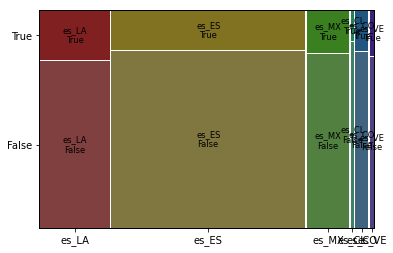

In [ ]:
# df.groupby(['locale'])['is_bs'].value_counts(normalize=True).mul(100)
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ['locale', 'is_bs']);

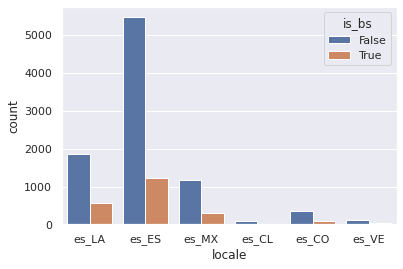

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="locale",hue='is_bs', data=df)

##Variable precio de lista y descuento

El precio de lista y el de descuento estan en formato string y con un signo \$, para estudiarlos como numeros hay que limpiar el \$ y llevarlos a numerico. En el precio con descuento cuando no aplica se asume que es que no tiene y se reemplaza con el valor de precio de lista. lo pasamos a float para que el modelo de arbol lo permita)

In [ ]:
df['list_price']=df['list_price'].str.replace("$","", regex=True).astype(float)
df['has_dis']=~df['discount_price'].isnull() #se crea columna bool "has_discount"
df['discount_price']=df['discount_price'].str.replace("$","", regex=True).fillna(df['list_price']).astype(float)
df.head()

,title,headline,is_practice_test_course,bestseller,captions,rating,num_published_lectures,num_published_practice_tests,locale,created_date,...,last_update_date,content_info_short,instructors,category,subcategory,objectives,list_price,discount_price,is_bs,has_dis
id,,,,,,,,,,,,,,,,,,,,,
1,Aprende a tocar Piano o Teclado (Desde nivel b...,Curso completo de Piano con TEORÍA para el fun...,False,no,es_LA,4.535809,58,1,es_LA,2012-01-26,...,2021-05-19,4 horas,121211,Música,Piano,Aprende Piano desde nivel básico. Estudiaras l...,34.99,12.00,False,True
2,Curso Hipoterapia y Rehabilitacion Ecuestre On...,"Terapias asistidas por Caballos (Hipoterapia, ...",False,no,es_ES,4.133590,32,0,es_ES,2012-06-10,...,2015-12-17,10 horas,236127,Estilo de vida,Adiestramiento de mascotas,La Hipoterapia y la Psicología.La Hipoterapia ...,99.99,99.99,False,False
3,Curso SEO Online,Curso SEO práctico. Aprenda a posicionar su si...,False,no,es_ES,3.841912,76,0,es_ES,2011-06-13,...,2020-02-28,"6,5 horas",3851,Marketing,SEO,Entender los fundamentos del SEO.Aprender a ha...,94.99,12.00,False,True
4,Aprende CSS3 sin dolor,"Realiza animaciones asombrosas, antes imposibl...",False,no,es_MX,4.039739,68,0,es_MX,2012-08-30,...,2019-09-08,"9,5 horas",171706,Desarrollo,CSS,El alumno conocerá las principales característ...,19.99,12.00,False,True
5,"Aprende Javascript, HTML5 y CSS3",Aprende los principales lenguajes que dominan ...,False,si,NaN,4.643154,550,0,es_MX,2012-08-30,...,2021-03-04,"70,5 horas",171706,Desarrollo,JavaScript,"Desarrollar páginas dinámicas con JavaScript, ...",29.99,12.00,True,True


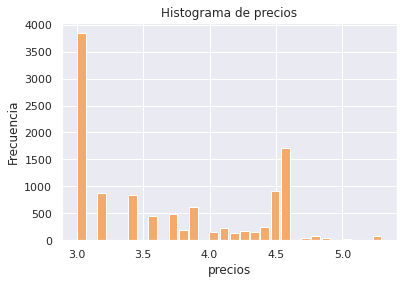

In [ ]:

import matplotlib.pyplot as plot
import math
precios=np.log(df["list_price"])

intervalos =30 #calculamos los extremos de los intervalos

plot.hist(x=precios, bins=intervalos, color='#F2AB6D', rwidth=0.85)
plot.title('Histograma de precios')
plot.xlabel('precios')
plot.ylabel('Frecuencia')
# plot.xticks(intervalos)

plot.show()

 #dibujamos el histogramafrecuencias,

# plot(df["discount_price"])

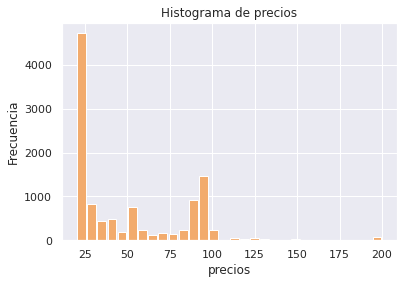

In [ ]:

precios=df["list_price"]

intervalos =30 #calculamos los extremos de los intervalos

plot.hist(x=precios, bins=intervalos, color='#F2AB6D', rwidth=0.85)
plot.title('Histograma de precios')
plot.xlabel('precios')
plot.ylabel('Frecuencia')
# plot.xticks(intervalos)

plot.show()

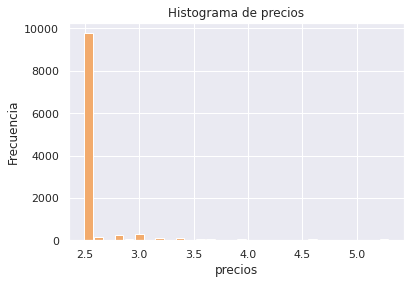

In [ ]:
precios=np.log(df["discount_price"])

intervalos =30 #calculamos los extremos de los intervalos

plot.hist(x=precios, bins=intervalos, color='#F2AB6D', rwidth=0.85)
plot.title('Histograma de precios')
plot.xlabel('precios')
plot.ylabel('Frecuencia')
# plot.xticks(intervalos)

plot.show()

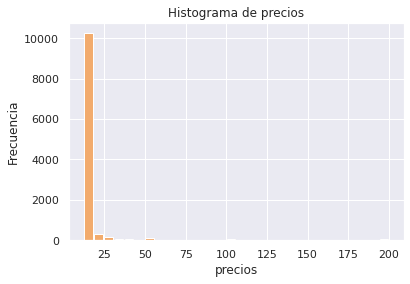

In [ ]:
precios=df["discount_price"]

intervalos =30 #calculamos los extremos de los intervalos

plot.hist(x=precios, bins=intervalos, color='#F2AB6D', rwidth=0.85)
plot.title('Histograma de precios')
plot.xlabel('precios')
plot.ylabel('Frecuencia')
# plot.xticks(intervalos)

plot.show()

In [ ]:
df["discount_price"].value_counts()

12.00     8966
13.00      811
19.99      284
16.00      207
14.00      152
24.99       90
29.99       85
49.99       72
39.99       64
199.99      64
17.00       52
34.99       51
99.99       45
18.00       32
59.99       30
15.00       28
54.99       25
19.00       24
44.99       20
79.99       20
69.99       15
149.99      15
119.99      13
64.99       13
89.99       13
129.99      11
74.99       11
94.99       10
139.99       7
189.99       7
84.99        6
124.99       5
23.00        5
159.99       5
109.99       4
21.00        3
22.00        2
169.99       2
179.99       1
20.00        1
Name: discount_price, dtype: int64

In [ ]:
df["list_price"].value_counts()

19.99     3842
94.99     1477
89.99      910
24.99      883
29.99      839
49.99      616
39.99      483
34.99      447
59.99      236
99.99      227
79.99      193
44.99      186
69.99      172
54.99      155
74.99      152
64.99      129
199.99      64
84.99       51
109.99      50
124.99      43
129.99      34
119.99      33
149.99      20
139.99      12
189.99       7
159.99       6
169.99       2
179.99       1
174.99       1
Name: list_price, dtype: int64

In [ ]:
df['loglistp']=np.log(df["list_price"])
df['logdiscp']=np.log(df["discount_price"])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11271 entries, 1 to 11326
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   title                         11271 non-null  object        
 1   headline                      11270 non-null  object        
 2   is_practice_test_course       11271 non-null  bool          
 3   bestseller                    11032 non-null  object        
 4   captions                      9285 non-null   object        
 5   rating                        11271 non-null  float64       
 6   num_published_lectures        11271 non-null  int64         
 7   num_published_practice_tests  11271 non-null  int64         
 8   locale                        11271 non-null  object        
 9   created_date                  11271 non-null  datetime64[ns]
 10  instructional_level_simple    11266 non-null  object        
 11  published_date              

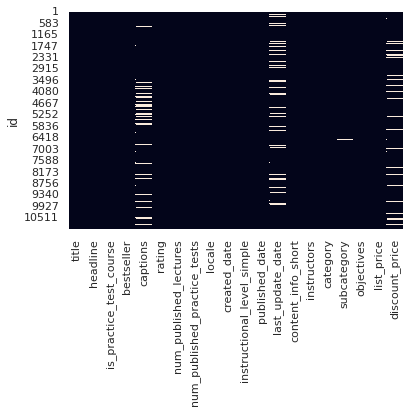

In [ ]:
#para ver cuantos valores nulos y en que categorias estan
df.info()
print(df_entrenamiento.isna().sum().sort_values(ascending=False)) #alternativa df.isnull().sum(), 
#me dice para todo el dataframe, para cada columna cuantos valores na tiene y ordena de mayor a menor
sns.heatmap(df_entrenamiento.isnull(), cbar=False) # para hacer en seaborn grafica de valores null

Una variable que puede ser de interés es el porcentaje de descuento.

In [ ]:
df['Disc_ratio']=df['discount_price']/df['list_price']
df.head()

,title,headline,is_practice_test_course,bestseller,captions,rating,num_published_lectures,num_published_practice_tests,locale,created_date,...,category,subcategory,objectives,list_price,discount_price,is_bs,has_dis,loglistp,logdiscp,Disc_ratio
id,,,,,,,,,,,,,,,,,,,,,
1,Aprende a tocar Piano o Teclado (Desde nivel b...,Curso completo de Piano con TEORÍA para el fun...,False,no,es_LA,4.535809,58,1,es_LA,2012-01-26,...,Música,Piano,Aprende Piano desde nivel básico. Estudiaras l...,34.99,12.00,False,True,3.555062,2.484907,0.342955
2,Curso Hipoterapia y Rehabilitacion Ecuestre On...,"Terapias asistidas por Caballos (Hipoterapia, ...",False,no,es_ES,4.133590,32,0,es_ES,2012-06-10,...,Estilo de vida,Adiestramiento de mascotas,La Hipoterapia y la Psicología.La Hipoterapia ...,99.99,99.99,False,False,4.605070,4.605070,1.000000
3,Curso SEO Online,Curso SEO práctico. Aprenda a posicionar su si...,False,no,es_ES,3.841912,76,0,es_ES,2011-06-13,...,Marketing,SEO,Entender los fundamentos del SEO.Aprender a ha...,94.99,12.00,False,True,4.553772,2.484907,0.126329
4,Aprende CSS3 sin dolor,"Realiza animaciones asombrosas, antes imposibl...",False,no,es_MX,4.039739,68,0,es_MX,2012-08-30,...,Desarrollo,CSS,El alumno conocerá las principales característ...,19.99,12.00,False,True,2.995232,2.484907,0.600300
5,"Aprende Javascript, HTML5 y CSS3",Aprende los principales lenguajes que dominan ...,False,si,NaN,4.643154,550,0,es_MX,2012-08-30,...,Desarrollo,JavaScript,"Desarrollar páginas dinámicas con JavaScript, ...",29.99,12.00,True,True,3.400864,2.484907,0.400133


Analizando si el porcentaje de descuento es una variable importante.

In [ ]:
df.groupby(['Disc_ratio'])['is_bs'].value_counts(normalize=True)

Disc_ratio  is_bs
0.126329    False    0.684798
            True     0.315202
0.126675    False    0.666667
            True     0.333333
0.127284    False    0.692308
                       ...   
0.640256    True     0.218750
0.650325    False    0.870259
            True     0.129741
1.000000    False    0.915992
            True     0.084008
Name: is_bs, Length: 209, dtype: float64

##Variable categoría y subcategoría

In [ ]:
print(df_entrenamiento.category.unique())
print(df_entrenamiento.category.unique().shape)

['Música' 'Estilo de vida' 'Marketing' 'Desarrollo'
 'Enseñanzas y disciplinas académicas' 'Desarrollo personal'
 'Productividad en la oficina' 'Negocios' 'Diseño' 'Fotografía y vídeo'
 'Salud y fitness' 'Informática y software' 'Finanzas y contabilidad']
(13,)


In [ ]:
print(df_entrenamiento.category.value_counts(normalize=True))

Informática y software                 0.157723
Desarrollo                             0.143038
Enseñanzas y disciplinas académicas    0.110859
Negocios                               0.105511
Diseño                                 0.099982
Desarrollo personal                    0.099438
Marketing                              0.053209
Salud y fitness                        0.050036
Estilo de vida                         0.048586
Finanzas y contabilidad                0.042966
Música                                 0.038978
Productividad en la oficina            0.032904
Fotografía y vídeo                     0.016769
Name: category, dtype: float64


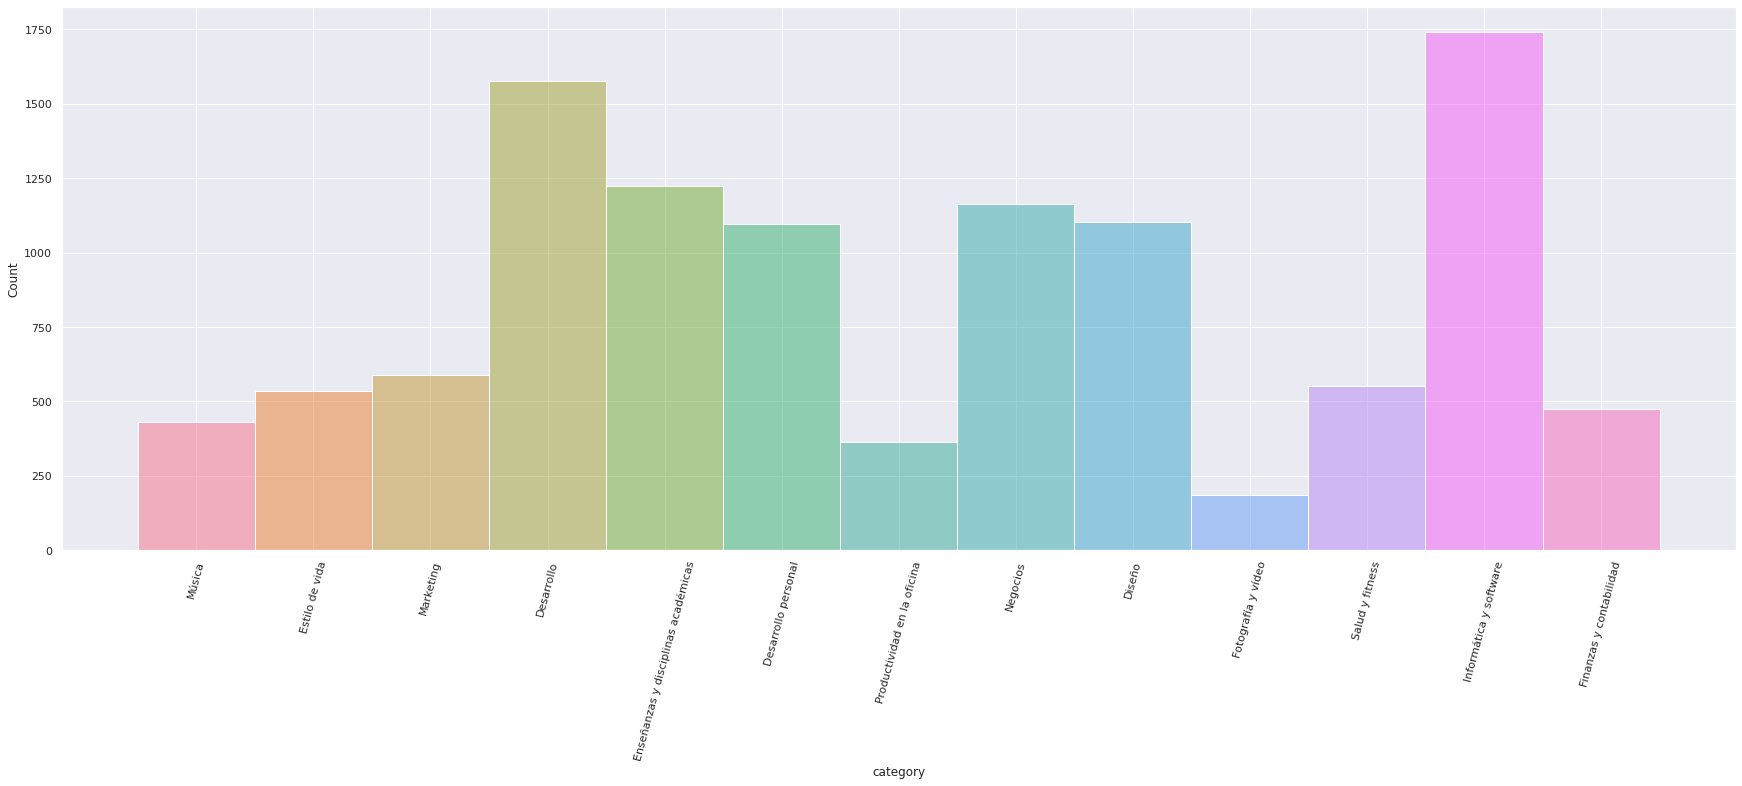

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.histplot(data=df_entrenamiento, x="category", hue="category", legend=False)
plt.xticks(rotation=75);

La mayor parte de los cursos corresponden a "informática y software", seguido por "desarrollo" y luego "enseñ. y disc. académicas". Luego, le siguen "negocios" y después, muy similares, "diseño" y "desarrollo personal".

In [ ]:
print(df_entrenamiento.subcategory.unique().shape)

(1868,)


In [ ]:
print(df_entrenamiento.subcategory.value_counts(normalize=False))
print(df_entrenamiento.subcategory.value_counts(normalize=True))

Excel                 147
Idioma inglés         104
WordPress             100
Python                 98
Photoshop              90
                     ... 
Pagos                   1
Gestión energética      1
ownCloud                1
Pintura digital         1
Hidráulica              1
Name: subcategory, Length: 1867, dtype: int64
Excel                 0.013348
Idioma inglés         0.009443
WordPress             0.009080
Python                0.008899
Photoshop             0.008172
                        ...   
Pagos                 0.000091
Gestión energética    0.000091
ownCloud              0.000091
Pintura digital       0.000091
Hidráulica            0.000091
Name: subcategory, Length: 1867, dtype: float64


In [ ]:
print(df_prueba.category.unique())
print(df_prueba.category.unique().shape)

['Informática y software' 'Desarrollo' 'Negocios' 'Estilo de vida'
 'Enseñanzas y disciplinas académicas' 'Marketing' 'Diseño'
 'Desarrollo personal' 'Música' 'Finanzas y contabilidad'
 'Productividad en la oficina' 'Salud y fitness' 'Fotografía y vídeo']
(13,)


Coincide la cantidad de categorías con el df de entrenamiento

In [ ]:
print(df_prueba.category.value_counts(normalize=True))

Informática y software                 0.259414
Enseñanzas y disciplinas académicas    0.150628
Desarrollo personal                    0.108787
Desarrollo                             0.100418
Negocios                               0.100418
Diseño                                 0.066946
Marketing                              0.050209
Estilo de vida                         0.041841
Finanzas y contabilidad                0.037657
Salud y fitness                        0.033473
Música                                 0.020921
Productividad en la oficina            0.016736
Fotografía y vídeo                     0.012552
Name: category, dtype: float64


Las categorías más abundantes coinciden (no en orden) con el df de entrenamiento.

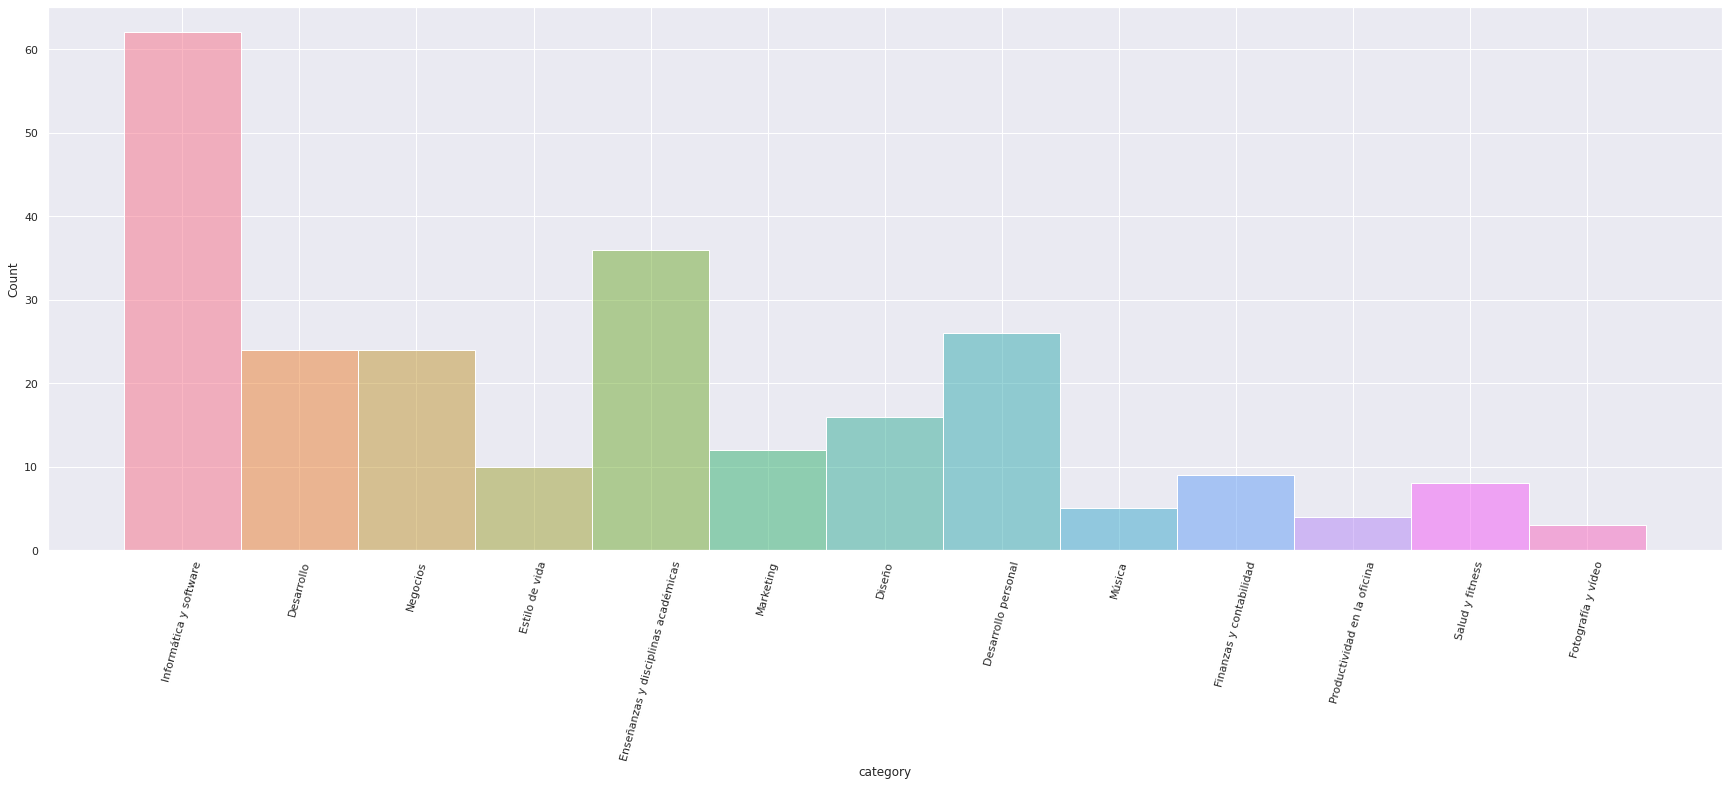

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.histplot(data=df_prueba, x="category", hue="category", legend=False)
plt.xticks(rotation=75);

La mayor parte de los cursos corresponden a "informática y software", seguido por "enseñ. y disc. académicas", y en tercer lugar "desarrollo personal". Muy proximos están "desarrollo" y "negocios".

In [ ]:
print(df_prueba.subcategory.unique().shape)

(198,)


Las subcategorías son casi 10 veces menos que las del conjunto de entrenamiento (1868).

In [ ]:
print(df_prueba.subcategory.value_counts(normalize=False))
print(df_prueba.subcategory.value_counts(normalize=True))

Idioma inglés                           8
Excel                                   3
Desarrollo web                          3
Comercio bursátil                       3
Redacción de textos publicitarios       3
                                       ..
Admisión a la universidad               1
Bioquímica                              1
Photoshop                               1
Blender                                 1
Superación de traumas de la infancia    1
Name: subcategory, Length: 197, dtype: int64
Idioma inglés                           0.033613
Excel                                   0.012605
Desarrollo web                          0.012605
Comercio bursátil                       0.012605
Redacción de textos publicitarios       0.012605
                                          ...   
Admisión a la universidad               0.004202
Bioquímica                              0.004202
Photoshop                               0.004202
Blender                                 0.004202
Sup

Se podría filtrar las subcategorías del df entrenamiento para que coincidan.

###variable rating

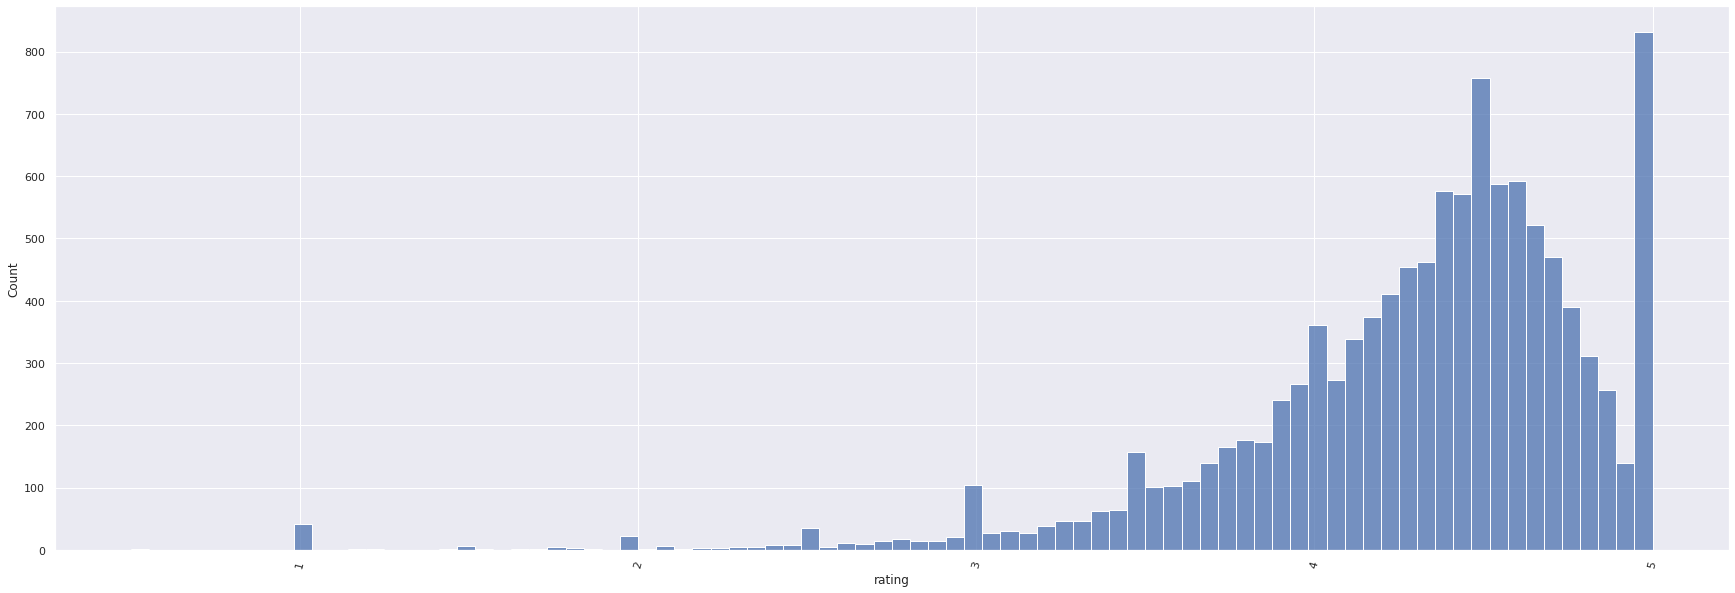

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.histplot(data=(df_entrenamiento.rating))
plt.xticks(rotation=75);

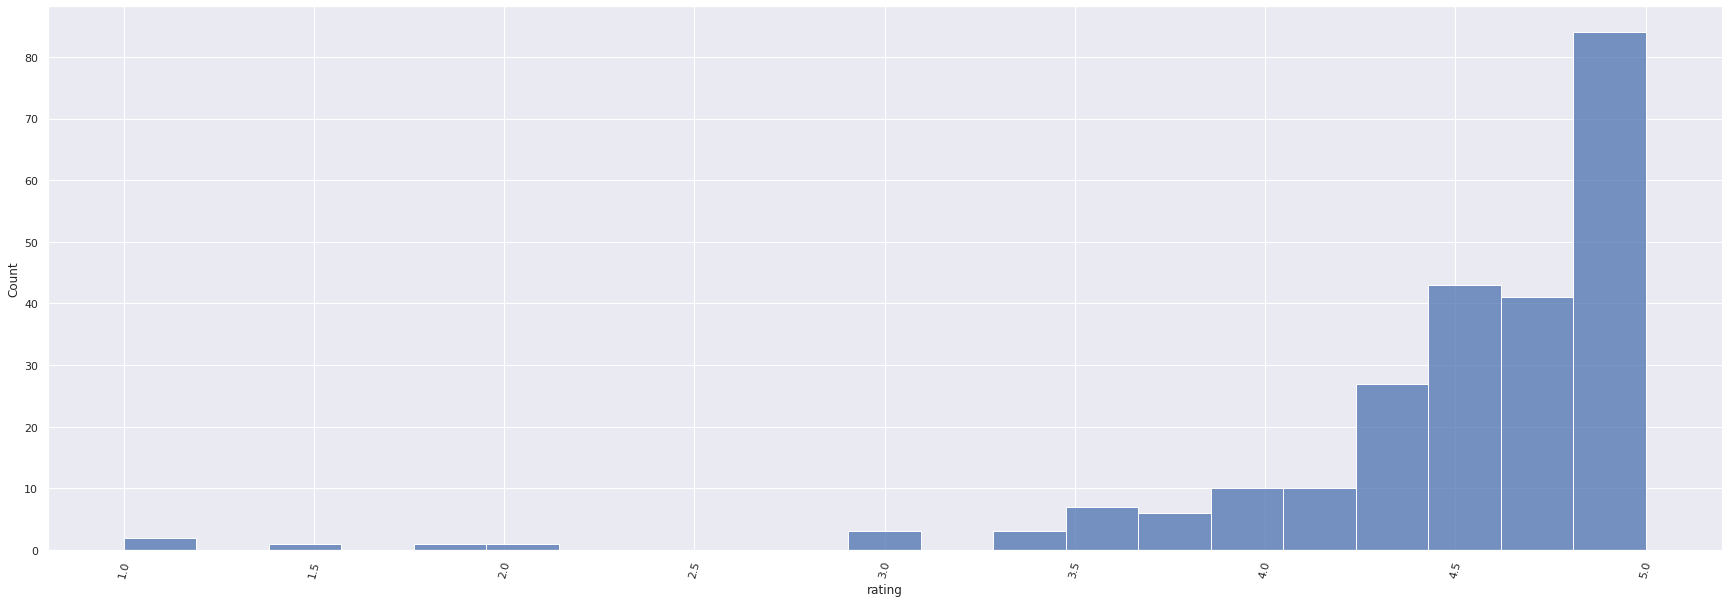

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.histplot(data=(df_prueba.rating))
plt.xticks(rotation=75);

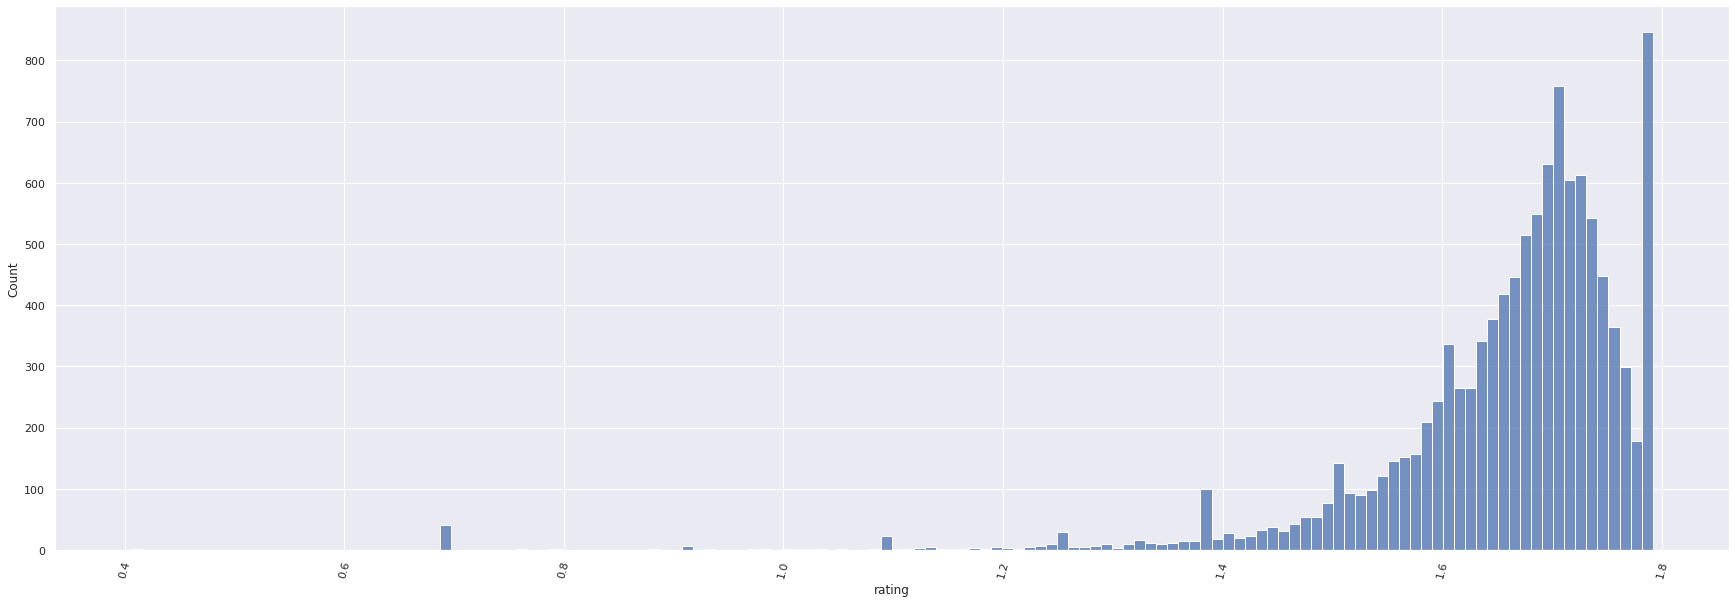

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.histplot(data=log_transform(df_entrenamiento.rating))
plt.xticks(rotation=75);

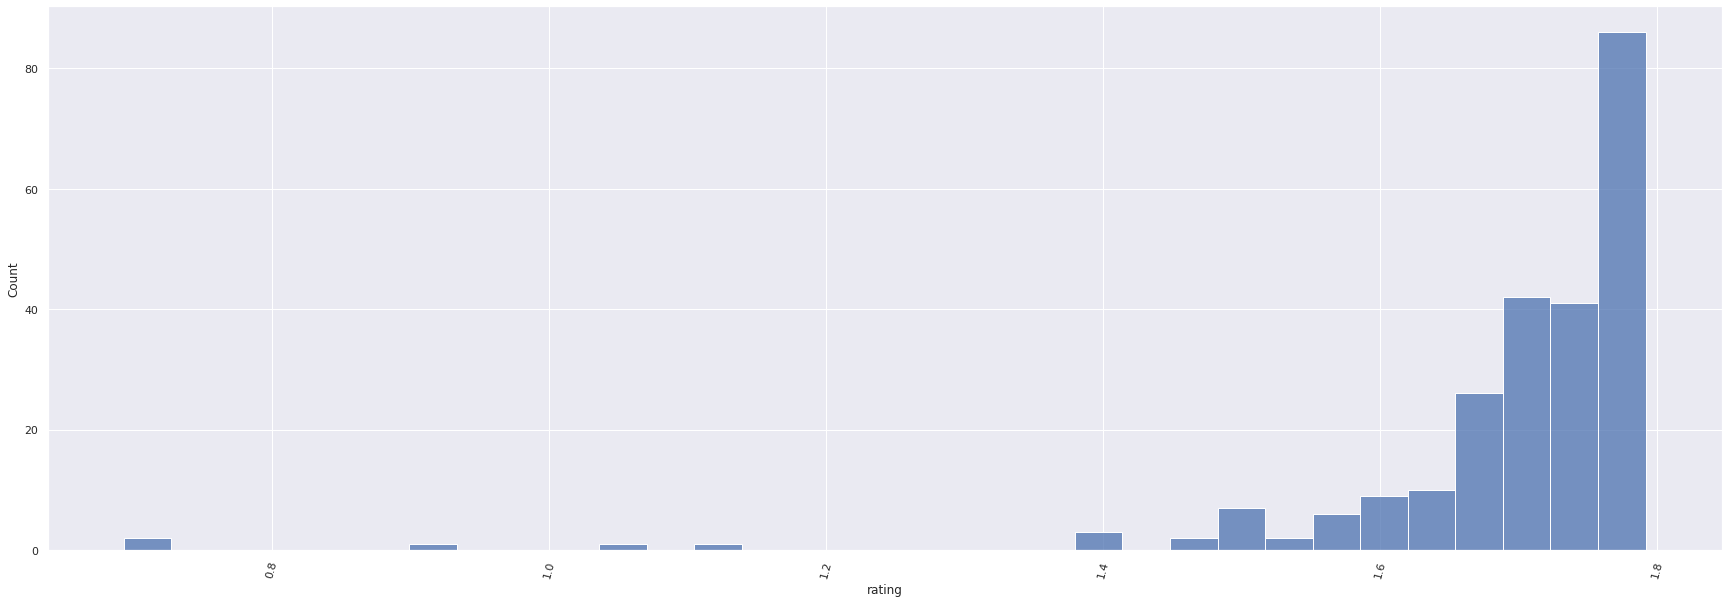

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.histplot(data=log_transform(df_prueba.rating))
plt.xticks(rotation=75);

In [ ]:
df['lograting']=log_transform(df["rating"])

In [ ]:
df.columns

Index(['title', 'headline', 'is_practice_test_course', 'bestseller',
       'captions', 'rating', 'num_published_lectures',
       'num_published_practice_tests', 'locale', 'created_date',
       'instructional_level_simple', 'published_date', 'last_update_date',
       'content_info_short', 'instructors', 'category', 'subcategory',
       'objectives', 'list_price', 'discount_price', 'is_bs', 'has_dis',
       'loglistp', 'logdiscp', 'Disc_ratio', 'lograting'],
      dtype='object')

#### Separemos la cantidad de preguntas y dejemos solo un numero

Creo la categoria informatica. uso *$ para no tomar desarrollo personal.

In [ ]:
df['s_informatica']= df["category"].str.contains('Informática y software|Desarrollo*$')
df['s_informatica'].value_counts()
df['s_vida']= df["category"].str.contains('Enseñanzas y disciplinas académicas|Desarrollo personal|Salud y fitness|Estilo de vida|Productividad en la oficina')
df['s_negocio']=df["category"].str.contains('Negocios|Marketing|Finanzas y contabilidad')
df['s_arte']=df["category"].str.contains('Diseño|Música|Fotografía y vídeo')

####creamos dummies de las columnas locale, category e instructional level

In [ ]:
df = pd.get_dummies(df, columns=['locale'])
df = pd.get_dummies(df, columns=['category'])
df = pd.get_dummies(df, columns=['instructional_level_simple'])
df['instructional_level_simple_Todos los niveles'].value_counts()

#renombro columna instructional_level_simple_Todos los niveles' a 'instructional_level_simple_Todos_los_niveles
df = df.rename(columns={'instructional_level_simple_Todos los niveles': 'instructional_level_simple_Todos_los_niveles'})

hago que para los cursos que son todos los niveles, poner un 1 en principiante, intermedio, experto pero no cambio el score del kaggle

In [ ]:
print(df.columns)

df.loc[df.instructional_level_simple_Todos_los_niveles == 1, :].replace(['instructional_level_simple_Experto',
       'instructional_level_simple_Intermedio','instructional_level_simple_Principiante'], [1,1 ,1 ], inplace=True)

Index(['title', 'headline', 'is_practice_test_course', 'bestseller',
       'captions', 'rating', 'num_published_lectures',
       'num_published_practice_tests', 'created_date', 'published_date',
       'last_update_date', 'content_info_short', 'instructors', 'subcategory',
       'objectives', 'list_price', 'discount_price', 'is_bs', 'has_dis',
       'loglistp', 'logdiscp', 'Disc_ratio', 'lograting', 's_informatica',
       's_vida', 's_negocio', 's_arte', 'locale_es_CL', 'locale_es_CO',
       'locale_es_ES', 'locale_es_LA', 'locale_es_MX', 'locale_es_VE',
       'category_Desarrollo', 'category_Desarrollo personal',
       'category_Diseño', 'category_Enseñanzas y disciplinas académicas',
       'category_Estilo de vida', 'category_Finanzas y contabilidad',
       'category_Fotografía y vídeo', 'category_Informática y software',
       'category_Marketing', 'category_Música', 'category_Negocios',
       'category_Productividad en la oficina', 'category_Salud y fitness',
       'in

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


####Captions: creamos variable has captions (0 si no tiene, 1 si tiene por lo menos subtitulo en un idioma)

In [ ]:
df["captions"].unique()

array(['es_LA', 'es_ES', 'es_MX', nan, 'es_CL', 'es_CO', 'es_VE',
       'es_ES,en_US', 'en_US', 'es_LA,en_GB', 'es_ES,en_US,pt_BR',
       'es_LA,en_US', 'zh_CN,pt_BR,ja_JP,it_IT,es_LA,ar_AR,fr_FR,en_US',
       'en_US,es_MX', 'en_US,es_ES', 'de_DE,en_US', 'es_CO,es_ES',
       'en_US,it_IT', 'es_LA,en_US,ro_RO,fr_FR',
       'it_IT,ru_RU,pt_BR,ko_KR,de_DE,en_US,es_ES,fr_FR',
       'it_IT,sv_SE,pt_BR,zh_HK,pl_PL,he_IL,da_DK,ru_RU,ko_KR,ja_JP,es_ES,de_DE,nl_NL,fr_FR,el_GR,ar_AR,fa_IR,id_ID,th_TH',
       'pt_BR,es_MX,en_US', 'es_ES,es_VE', 'en_IN', 'en_US,es_LA',
       'en_US,pt_BR,es_CL', 'en_US,es_LA,pt_BR', 'es_CO,es_LA',
       'es_CO,en_GB', 'pt_BR,es_ES,en_US', 'es_ES,en_GB', 'it_IT,es_ES',
       'en_GB', 'es_ES,en_GB,en_US', 'es_VE,es_ES',
       'pt_PT,en_US,es_MX,es_CL,pt_BR,es_LA,en_IN,en_GB,es_VE,es_CO,es_ES',
       'en_US,es_CL', 'es_ES,fr_FR,en_US', 'es_MX,en_US',
       'en_US,pt_BR,es_LA', 'en_US,it_IT,es_LA,pt_BR', 'es_LA,pt_BR',
       'es_ES,pt_BR,en_US,it_IT', 'e

In [ ]:
df['has_captions']=(df['captions'].isna())
#assert df.shape[0]==12945, "El shape de dataframe esta mal " es un CHECKPOINT, para antes de entrar al modelo, para asegurarse que se cumpla

In [ ]:
df['has_captions'].value_counts()

False    9285
True     1986
Name: has_captions, dtype: int64

In [ ]:
#df["captions"].str.split(",").str[0].unique() #da los subtitulos que aparecen primero
#df["captions"].str.split(",").str[4].unique() #los subtitulos que aparecne quintos
dummies_subtitulos=df["captions"].str.get_dummies(sep=",").add_prefix('captions') #para hacer dummies multivariadas
df= pd.concat([df,dummies_subtitulos], axis=1)
#[c for c in df.columns if c.startswith("locale")] #selecciona solo las columnas que empezan con locale para despues sumar y saber la cantidad de subtituls

In [ ]:
# columnas=df.columns
# #for i in range (len(columnas)):
#  # if columnas[i].startswith("captions"):
#   #  print (columnas[i])
# #[c for c in df.columns if c.startswith("captions")]
# #print(c)
# subtitulos=["captionsda_DK","captionsde_DE",
#        "captionsel_GR","captionsen_IN","captionsfa_IR","captionsfr_FR",
#        "captionshe_IL","captionsid_ID","captionsja_JP","captionsko_KR",
#        "captionsnl_NL","captionspl_PL","captionspt_PT","captionsro_RO",
#        "captionsru_RU","captionssv_SE","captionsth_TH","captionszh_CN",
#        "captionszh_HK"]
# for i in range (len(subtitulos)):
#   print (subtitulos[i],df[subtitulos[i]].sum())

# #los subtitulos que tienen menos de 10 repeticions los agupamos en "otros"

# df['other_captions'] = df['captionsar_AR'] + df['captionsda_DK'] + df['captionsde_DE']
# +df["captionsel_GR"]+df["captionsen_IN"]+df["captionsfa_IR"]
# +df["captionsfr_FR"]+df["captionshe_IL"]+df["captionsid_ID"]+df["captionsja_JP"]
# +df["captionsko_KR"]+df["captionsnl_NL"]+df["captionspl_PL"]+df["captionspt_PT"]
# +df["captionsro_RO"]+df["captionsru_RU"]+df["captionssv_SE"]+df["captionsth_TH"]+df["captionszh_CN"]+df["captionszh_HK"]
# #df[df.columns[pd.Series(df.columns).str.startswith('captions')]]


In [ ]:
#df['captions'].str.get_dummies(sep=',').columns
#df['captions_es_sin_na']=df['captions_es'].fillna(False)
#print(df['captions_es_sin_na'].isnull().value_counts())
#print(df['captions_es_sin_na'].value_counts())

# INGLES: captionsen_GB, captionsen_US, captionsen_IN
# ESPAÑOL: captionses_CL",captionses_CO","captionses_ES","captionses_LA","captionses_MX","captionses_VE",
# OTROS: captionsit_IT","captionspt_BR", captionsar_AR]captionsda_DKcaptionsde_DE,"captionsel_GR","","captionsfa_IR","captionsfr_FR",
#       "captionshe_IL","captionsid_ID","captionsja_JP","captionsko_KR",
#       "captionsnl_NL","captionspl_PL","captionspt_PT","captionsro_RO",
 #      "captionsru_RU","captionssv_SE","captionsth_TH","captionszh_CN",
  #     "captionszh_HK"]

df['cantidad_subtitulos'] = df.captions.str.count(',').fillna(-1)
df['cantidad_subtitulos'] =df['cantidad_subtitulos'] +1
df['cantidad_subtitulos'].unique()

array([ 1.,  0.,  2.,  3.,  8.,  4., 19., 11.])

In [ ]:
#genero dos columnas bool si tienen subtitulos en español y otra para el ingles
##Se agrega una columna para saber si el curso cuenta con subtítulos en español, 
#sin embargo, no mejora la predicción. Entre otras cosas, los valores nulos de captions se reemplazan por False.


df['captions_ingles']= df["captions"].str.contains('en_').fillna(False)
df['captions_ingles'].value_counts()

False    11176
True        95
Name: captions_ingles, dtype: int64

In [ ]:
df['captions_español']= df["captions"].str.contains('es_').fillna(False)
df['captions_español'].value_counts()

True     9268
False    2003
Name: captions_español, dtype: int64

####creamos variable has last_update_date 

In [ ]:
df['has_update_date']=df['last_update_date'].isna()
#reemplazo true (esta vacio), con un 0 (no tiene subido el update) y false con 1
#df['has_update_date']=df['has_update_date'].map(dict_map2)
#print(df['has_update_date'].unique())
#print(df['has_update_date'])


<h3> Dividir toda la columna cotent info short.

In [ ]:
df_content_info_short = df["content_info_short"].str.split(' ', expand=True)
df_content_info_short[0]=df_content_info_short[0].str.replace(",",".", regex=True).astype(float)
df_content_info_short['duracion_horas']=df_content_info_short[df_content_info_short[1].str.contains("minutos")][0]/60
df_content_info_short['duracion_horas']=df_content_info_short[df_content_info_short[1].str.contains("horas")][0]
df_content_info_short['duracion_horas']=df_content_info_short[df_content_info_short[1].str.contains("hora")][0]
df_content_info_short['cantidad_preguntas']=df_content_info_short[df_content_info_short[1].str.contains("preguntas")][0]
#los valores faltantes se completan con el promedio de duración
df_content_info_short['tiene_duracion']=df_content_info_short[1].str.contains('horas|minutos|hora')
df_content_info_short['tiene_preguntas']=df_content_info_short[1].str.contains('preguntas')
df_content_info_short['duracion_horas']=df_content_info_short['duracion_horas'].fillna(df_content_info_short['duracion_horas'].mean()).astype(float)
df_content_info_short.head()

,0,1,duracion_horas,cantidad_preguntas,tiene_duracion,tiene_preguntas
id,,,,,,
1,4.0,horas,4.0,NaN,True,False
2,10.0,horas,10.0,NaN,True,False
3,6.5,horas,6.5,NaN,True,False
4,9.5,horas,9.5,NaN,True,False
5,70.5,horas,70.5,NaN,True,False


In [ ]:
df['is_practice_test_course'].value_counts()

False    11073
True       198
Name: is_practice_test_course, dtype: int64

In [ ]:
df= df.join(df_content_info_short)
print(df.shape)

(11271, 91)


<h3> Generamos costo por tiempos de curso. logaritmeado

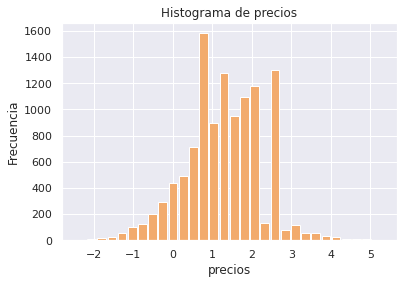

In [ ]:

preciosxh=np.log(df['discount_price']/df['duracion_horas'])

intervalos =30 #calculamos los extremos de los intervalos

plot.hist(x=preciosxh, bins=intervalos, color='#F2AB6D', rwidth=0.85)
plot.title('Histograma de precios')
plot.xlabel('precios')
plot.ylabel('Frecuencia')
# plot.xticks(intervalos)

df['logpxh']=np.log(df['discount_price']/df['duracion_horas'])
plot.show()

Tomamos un codigo remixeado de internet para ver cuales son las palabras mas usadas en bs.

In [ ]:
df["python"] = df["title"].str.contains("Python")
#print(df[df.title.str.contains("Python")].is_bs.value_counts(normalize=True))

df["completo"] = df["title"].str.contains("completo")
#print(df[df.title.str.contains("completo")].is_bs.value_counts(normalize=True))

df["Excel"] = df["title"].str.contains("Excel")
#print(df[df.title.str.contains("Excel")].is_bs.value_counts(normalize=True))

<h3> Armar las columnas de años.

In [ ]:
#creamos categoria año
df['Anio_p']=pd.DatetimeIndex(df['created_date']).year
df['last_update_date'].fillna(df['created_date'], inplace=True)
df['Anio_u']=pd.DatetimeIndex(df['last_update_date']).year
df['isu2d']=~df['last_update_date'].isnull()

In [ ]:
df["instructors"].isnull()
df[pd.isnull(df["instructors"])]
#el ID 5008 no tiene instrutror, se podria probar a borrar esa fila


,title,headline,is_practice_test_course,bestseller,captions,rating,num_published_lectures,num_published_practice_tests,created_date,published_date,...,cantidad_preguntas,tiene_duracion,tiene_preguntas,logpxh,python,completo,Excel,Anio_p,Anio_u,isu2d
id,,,,,,,,,,,,,,,,,,,,,
5008,"Aprende a bailar swing criollo, una nueva form...","Swing Criollo costarricense, una forma muy sal...",False,si,es_LA,4.788204,19,0,2019-05-08,2019-06-06,...,NaN,True,False,2.484907,False,False,False,2019,2020,True


##variable de instructores

In [ ]:
#completo el único valor perdido
df['has_instructor']=~df['instructors'].isnull()
df['instructors'].fillna("sin_instructor", inplace=True)
#reviso cuales son los instructores con mayor cantidad de cursos
instr_mas_cursos=df['instructors'].str.get_dummies(sep=',').sum().sort_values(ascending=False).head(n=20)

In [ ]:
instr_mas_cursos.shape

(20,)

In [ ]:
instr_mas_cursos.to_dict()

{'11005030': 35,
 '114656560': 34,
 '115981390': 70,
 '15958398': 43,
 '16454728': 35,
 '16661812': 34,
 '171706': 58,
 '18013970': 38,
 '20757364': 28,
 '21023336': 81,
 '23191974': 28,
 '25193680': 32,
 '31832740': 69,
 '3311510': 97,
 '38434392': 31,
 '44966978': 74,
 '48969372': 33,
 '5989196': 28,
 '7454352': 37,
 '82598714': 30}

In [ ]:
instr_mas_cursos

3311510      97
21023336     81
44966978     74
115981390    70
31832740     69
171706       58
15958398     43
18013970     38
7454352      37
11005030     35
16454728     35
16661812     34
114656560    34
48969372     33
25193680     32
38434392     31
82598714     30
23191974     28
5989196      28
20757364     28
dtype: int64

In [ ]:
df_entrenamiento['has_instructor']=~df_entrenamiento['instructors'].isnull()
df_entrenamiento['instructors'].fillna("sin_instructor", inplace=True)

Los instructores que tienen mayor cantidad de cursos, pueden no ser los que tengan mas bestsellers. A continuación se analizan qué instructores tienen más cursos bestseller.

In [ ]:
# instr_mas_cursos_bs=df[df['is_bs']==True]['instructors'].str.get_dummies(sep=',').sum().sort_values(ascending=False).head(n=20)

In [ ]:
instr_mas_cursos_bs=df[df['is_bs']==True]['instructors'].str.get_dummies().sum().sort_values(ascending=True)

In [ ]:
instr_mas_cursos_bs

10012816              1
4116740,124170020     1
41221952              1
41264306              1
41329022              1
                     ..
82598714             19
68383616             20
16080882             25
11767934             26
16661812             31
Length: 1129, dtype: int64

In [ ]:
df['instr_cant_bs']=0

for i in range(len(instr_mas_cursos_bs)):
# for i in range(2):  
  print(instr_mas_cursos_bs.index[i])
  print(i)
  df.loc[df['instructors'].str.contains(instr_mas_cursos_bs.index[i], na=False),'instr_cant_bs']=instr_mas_cursos_bs.iloc[i]

10012816
0
4116740,124170020
1
41221952
2
41264306
3
41329022
4
41433283
5
41463832
6
41518522
7
41689248
8
4171224
9
41802738
10
41824000
11
41126474
12
41853742
13
42458548
14
42601228
15
426125
16
42758320
17
42814308
18
43093042
19
43210112
20
43271464
21
43397596
22
4343232
23
43509304,14703256,45166446,30906936
24
42092632
25
41076606
26
41035932
27
41019856
28
37783258
29
37911620
30
37944508
31
381945
32
38228954
33
38273820
34
38439820
35
39012072
36
3917560
37
39183086
38
39183086,47815466
39
39245084
40
3959278
41
398428
42
39984838
43
400065
44
4007382
45
40130196
46
40402710
47
40405784
48
40704366
49
40795422
50
4084858
51
40856144
52
4096324
53
43509304,45166446,14703256
54
37779542
55
43509304,45166446,14703256,30906936,21059768,33757
56
43760950
57
47688736,24645730,54091018,53628100
58
47789714
59
47878524
60
4799248
61
4808066
62
48358852
63
48585774
64
488263
65
48838684
66
488921
67
48969372,123393604
68
46990636
69
49031256
70
49260754
71
49408184
72
49613090
73
4

In [ ]:
df.loc[df['instr_cant_bs']==31,'instr_cant_bs']

id
797      31
817      31
847      31
848      31
942      31
982      31
1091     31
1121     31
1207     31
1228     31
1252     31
1318     31
1361     31
1415     31
1617     31
1713     31
1764     31
1791     31
1839     31
2068     31
2355     31
2563     31
2807     31
3058     31
3539     31
4469     31
4901     31
5508     31
6196     31
6882     31
10499    31
10941    31
11045    31
11085    31
Name: instr_cant_bs, dtype: int64

In [ ]:
# df['instructors_mas_cursos']=df['instructors_mas_cursos'].fillna(False)
# df['instructors_mas_cursos'].value_counts()

df['instructores_1']= df["instructors"].str.contains('3311510').fillna(False)
df['instructores_2']= df["instructors"].str.contains('21023336').fillna(False)
df['instructores_3']= df["instructors"].str.contains('44966978').fillna(False)
df['instructores_4']= df["instructors"].str.contains('115981390').fillna(False)
df['instructores_5']= df["instructors"].str.contains('31832740').fillna(False)
df['instructores_6']= df["instructors"].str.contains('171706').fillna(False)
df['instructores_7']= df["instructors"].str.contains('15958398').fillna(False)
df['instructores_8']= df["instructors"].str.contains('18013970').fillna(False)
df['instructores_9']= df["instructors"].str.contains('7454352').fillna(False)
df['instructores_10']= df["instructors"].str.contains('16454728').fillna(False)

df['instructores_mas_cursos'] = df[['instructores_1', 'instructores_2',"instructores_4",
                                    "instructores_5", "instructores_6","instructores_7",
                                    "instructores_8", "instructores_9", "instructores_10"]].sum(axis=1)

print(df["instructores_mas_cursos"].value_counts(),df["instructores_mas_cursos"].unique())

#remuevo las columnas
df.drop(['instructores_1', 'instructores_2', "instructores_3", "instructores_4", "instructores_5",
         "instructores_6", "instructores_7", "instructores_8", "instructores_9", "instructores_10"], axis = 1)

0    10857
1      343
3       42
2       29
Name: instructores_mas_cursos, dtype: int64 [0 1 2 3]


,title,headline,is_practice_test_course,bestseller,captions,rating,num_published_lectures,num_published_practice_tests,created_date,published_date,...,logpxh,python,completo,Excel,Anio_p,Anio_u,isu2d,has_instructor,instr_cant_bs,instructores_mas_cursos
id,,,,,,,,,,,,,,,,,,,,,
1,Aprende a tocar Piano o Teclado (Desde nivel b...,Curso completo de Piano con TEORÍA para el fun...,False,no,es_LA,4.535809,58,1,2012-01-26,2012-01-26,...,1.098612,False,False,False,2012,2021,True,True,0,0
2,Curso Hipoterapia y Rehabilitacion Ecuestre On...,"Terapias asistidas por Caballos (Hipoterapia, ...",False,no,es_ES,4.133590,32,0,2012-06-10,2012-06-10,...,2.302485,False,False,False,2012,2015,True,True,0,0
3,Curso SEO Online,Curso SEO práctico. Aprenda a posicionar su si...,False,no,es_ES,3.841912,76,0,2011-06-13,2012-07-03,...,0.613104,False,False,False,2011,2020,True,True,0,0
4,Aprende CSS3 sin dolor,"Realiza animaciones asombrosas, antes imposibl...",False,no,es_MX,4.039739,68,0,2012-08-30,2012-08-31,...,0.233615,False,False,False,2012,2019,True,True,19,1
5,"Aprende Javascript, HTML5 y CSS3",Aprende los principales lenguajes que dominan ...,False,si,NaN,4.643154,550,0,2012-08-30,2012-09-02,...,-1.770706,False,False,False,2012,2021,True,True,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11322,Bootcamp de Redacción Publicitaria (Copywritin...,Puede escribir un texto que venda: redes socia...,False,NaN,es_LA,4.155691,65,0,2021-03-31,2021-04-21,...,0.875469,False,False,False,2021,2021,True,True,0,0
11323,Estructuras de Acero I: Elementos a Compresión,Conceptos y aplicación con referencia al AISC ...,False,NaN,es_LA,4.818863,16,0,2021-03-31,2021-04-22,...,0.780159,False,False,False,2021,2021,True,True,3,0
11324,Fortinet Security 6.4 - NSE4,Conviértase en un especialista en el corto tie...,False,NaN,NaN,3.740466,40,0,2021-03-31,2021-04-22,...,0.875469,False,False,False,2021,2021,True,True,0,0


Normalizacion de columnas numericas

In [ ]:
# # ........................................Celda de normalización...............................
# # Ponemos las variables numericas entre 0-1
# df_normalizado = df.copy()
# columnas = ['rating',"num_published_lectures","num_published_practice_tests",
#          "cantidad_subtitulos","duracion_horas",];

# for i in columnas:
#   # Restamos la media y lo dividimos por la varianza
#   df_normalizado[i] = (df[i]-df[i].mean())/df[i].std();
  
#   # Escalamos entre valores entre 0 y 1
#   min_value         = df_normalizado[i].min();
#   max_value         = df_normalizado[i].max();
#   df[i] = (df_normalizado[i]-min_value)/(max_value-min_value);

In [ ]:
# #chequeo que se hayan normalizado los datos
# print(df["rating"])
# print(df["num_published_lectures"])
# print(df["num_published_practice_tests"])
# print(df["cantidad_subtitulos"])
# print(df["duracion_horas"])

###Separamos la base de datos en como estaba originalmente (seguro se puede mejorar el codigo con drop) chequearque se mantenga el orden con el de prueba original?

In [ ]:
#print(df["bestseller"].unique())
#df_no=df.loc[df["bestseller"]== "no"]
#df_si=df.loc[df["bestseller"]== "si"]
#df_prueba=df.loc[df["bestseller"].isnull()]
#print(df_no.shape, df.shape,df_si.shape,df_prueba.shape)
#df_entrenamiento= pd.concat([df_si, df_no], axis=0)
#print(df.shape, df_si.shape, df_no.shape, df_entrenamiento.shape, df_prueba.shape)

#otra forma de separar el df? 
#mask = df['bestseller'].isnull()
#df_entrenamiento= df[~mask]
#df_prueba= df[mask]

df_prueba=df[df["bestseller"].isnull()]
df_prueba.shape
df_entrenamiento=df[-df["bestseller"].isnull()]
df_entrenamiento.shape

(11032, 111)

In [ ]:
print(df_prueba.shape, df_entrenamiento.shape)

(239, 111) (11032, 111)


In [ ]:
#agrego un valor missing con la moda (False)
df_entrenamiento["is_practice_test_course"].unique()
df["is_practice_test_course"].value_counts()
df_entrenamiento['is_practice_test_course']=df_entrenamiento['is_practice_test_course'].fillna(value=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11032 entries, 1 to 11087
Columns: 111 entries, title to instructores_mas_cursos
dtypes: bool(28), datetime64[ns](3), float64(12), int64(36), object(9), uint8(23)
memory usage: 5.7+ MB


<h3>Generar un oversampleo:

# Limpieza

In [ ]:
# 'category_Desarrollo', 'category_Desarrollo personal',
#        'category_Diseño', 'category_Enseñanzas y disciplinas académicas',
#        'category_Estilo de vida', 'category_Finanzas y contabilidad',
#        'category_Fotografía y vídeo', 'category_Informática y software',
#        'category_Marketing', 'category_Música', 'category_Negocios',
#        'category_Productividad en la oficina', 'category_Salud y fitness',
# ["is_practice_test_course",'bestseller','rating',
#             "num_published_lectures","num_published_practice_tests",'loglistp','logdiscp','logpxh',
#         "Disc_ratio","s_informatica","s_vida","s_negocio","s_arte", 'locale_es_CL',
#        'locale_es_CO', 'locale_es_ES', 'locale_es_LA', 'locale_es_MX',
#        'locale_es_VE', 'instructional_level_simple_Experto','instructional_level_simple_Intermedio',
#        'instructional_level_simple_Principiante',"cantidad_subtitulos",
#        "python","completo","Excel","Anio_p","Anio_u", "has_update_date", "duracion_horas",
#        "tiene_duracion" ,"tiene_preguntas","has_instructor",'has_captions',
#        "instructors_mas_cursos","other_captions","captionsen_GB","captionsen_US","captionses_CL",
#        "captionses_CO","captionses_ES","captionses_LA","captionses_MX","captionses_VE",
#        "captionsit_IT","captionspt_BR","captions_español","captions_ingles"]

columnas = ["is_practice_test_course",'bestseller','rating',
            "num_published_lectures",'loglistp','logdiscp','logpxh', 'lograting', 'instr_cant_bs',
        "Disc_ratio","s_informatica","s_vida","s_arte",'instructional_level_simple_Intermedio',
       'instructional_level_simple_Principiante',
       "completo","Anio_p","Anio_u", "has_update_date", "duracion_horas",
       "tiene_duracion","instructores_mas_cursos",
       'category_Desarrollo','category_Enseñanzas y disciplinas académicas',
       'category_Fotografía y vídeo', 'category_Informática y software',
       'category_Salud y fitness']
print(len(columnas))

#chequeo si hay valores NA de las columnas que vamos a usar para el modelado
for i in columnas: 
  print("la columna", i, df_entrenamiento[i].isnull().values.any())

df_entrenamiento = df_entrenamiento[columnas]
df_prueba = df_prueba[columnas]
df=df[columnas]
len(df_entrenamiento.columns)==len(df_prueba.columns) #chequeo que tengan las mismas columnas

27
la columna is_practice_test_course False
la columna bestseller False
la columna rating False
la columna num_published_lectures False
la columna loglistp False
la columna logdiscp False
la columna logpxh False
la columna lograting False
la columna instr_cant_bs False
la columna Disc_ratio False
la columna s_informatica False
la columna s_vida False
la columna s_arte False
la columna instructional_level_simple_Intermedio False
la columna instructional_level_simple_Principiante False
la columna completo False
la columna Anio_p False
la columna Anio_u False
la columna has_update_date False
la columna duracion_horas False
la columna tiene_duracion False
la columna instructores_mas_cursos False
la columna category_Desarrollo False
la columna category_Enseñanzas y disciplinas académicas False
la columna category_Fotografía y vídeo False
la columna category_Informática y software False
la columna category_Salud y fitness False


True

In [ ]:
df_entrenamiento.head()

,is_practice_test_course,bestseller,rating,num_published_lectures,loglistp,logdiscp,logpxh,lograting,instr_cant_bs,Disc_ratio,...,Anio_u,has_update_date,duracion_horas,tiene_duracion,instructores_mas_cursos,category_Desarrollo,category_Enseñanzas y disciplinas académicas,category_Fotografía y vídeo,category_Informática y software,category_Salud y fitness
id,,,,,,,,,,,,,,,,,,,,,
1,False,no,4.535809,58,3.555062,2.484907,1.098612,1.711238,0,0.342955,...,2021,False,4.0,True,0,0,0,0,0,0
2,False,no,4.133590,32,4.605070,4.605070,2.302485,1.635805,0,1.000000,...,2015,False,10.0,True,0,0,0,0,0,0
3,False,no,3.841912,76,4.553772,2.484907,0.613104,1.577310,0,0.126329,...,2020,False,6.5,True,0,0,0,0,0,0
4,False,no,4.039739,68,2.995232,2.484907,0.233615,1.617354,19,0.600300,...,2019,False,9.5,True,1,1,0,0,0,0
5,False,si,4.643154,550,3.400864,2.484907,-1.770706,1.730443,19,0.400133,...,2021,False,70.5,True,1,1,0,0,0,0


In [ ]:
df.shape


(11271, 27)

In [ ]:
df_entrenamiento.shape

(11032, 27)

# Territorio de Aprendizaje Automático
Se mira y no se toca

In [ ]:
scores = []
max_d = [5,10,15]

In [ ]:
# Datos para probar
X = df_entrenamiento[df_entrenamiento.columns.drop('bestseller')]
y = df_entrenamiento['bestseller']

# Partimos en entrenamiento y prueba 
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

for e in max_d:
  print(e)
# Creamos el objeto del modelo
  clf = sk.ensemble.RandomForestClassifier(n_estimators=3000, criterion='gini', max_depth=e, n_jobs=-1, random_state=42)

# Entrenamos el modelo
  clf.fit(X_train, y_train)

# Predecimos
  y_pred = clf.predict(X_test)

# Medimos la performance de la predicción
  scores.append(sk.metrics.accuracy_score(y_test, y_pred))

5
10
15


In [ ]:
scores

[0.839148164929769, 0.8676937018577254, 0.8763026733121885]

In [ ]:
# Creamos el objeto del modelo
clf = sk.ensemble.RandomForestClassifier(n_estimators=3000, criterion='gini', max_depth=15, n_jobs=-1, random_state=42)

In [ ]:
# Datos a predecir 
X_prueba = df_prueba[df_prueba.columns.drop('bestseller')]

# Entrenamos el modelo con todos los datos
clf.fit(X, y)

# Predecimos
df_prueba['bestseller'] = clf.predict(X_prueba)

# Grabamos
df_prueba['bestseller'].to_csv('/content/solucion.csv')

In [ ]:
columnas_2=df_entrenamiento.columns.drop('bestseller')
columnas_2

Index(['is_practice_test_course', 'rating', 'num_published_lectures',
       'loglistp', 'logdiscp', 'logpxh', 'lograting', 'instr_cant_bs',
       'Disc_ratio', 's_informatica', 's_vida', 's_arte',
       'instructional_level_simple_Intermedio',
       'instructional_level_simple_Principiante', 'completo', 'Anio_p',
       'Anio_u', 'has_update_date', 'duracion_horas', 'tiene_duracion',
       'instructores_mas_cursos', 'category_Desarrollo',
       'category_Enseñanzas y disciplinas académicas',
       'category_Fotografía y vídeo', 'category_Informática y software',
       'category_Salud y fitness'],
      dtype='object')

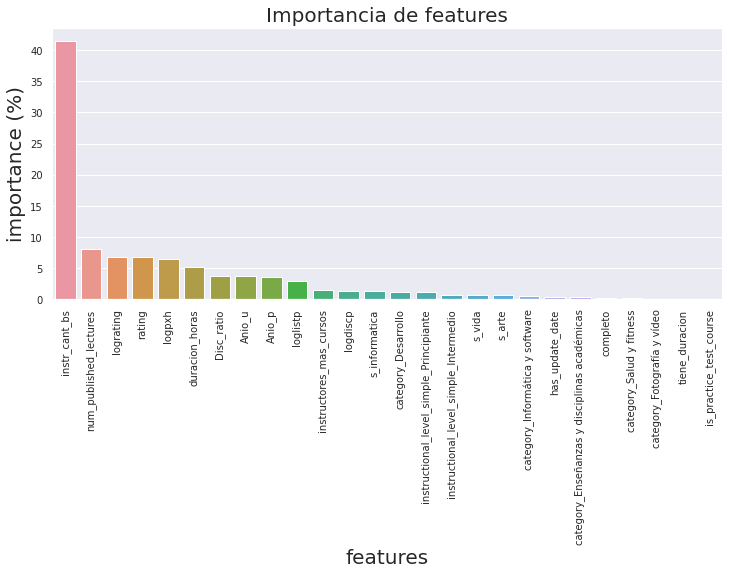

In [ ]:
diccionario = pd.DataFrame(list(zip(columnas_2,clf.feature_importances_*100)), columns = ['features','importance (%)']);
primeros = diccionario.nlargest(40,columns=['importance (%)']);

plt.figure(figsize=(12,5))
sns.barplot(x = "features", y = "importance (%)",data = primeros)
plt.xticks(rotation = 90,fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Importancia de features', fontsize=20)
plt.xlabel('features', fontsize=20)
plt.ylabel('importance (%)', fontsize=20)
plt.show()

In [ ]:
print(clf.feature_importances_)
print(clf.n_features_)

[0.0006092  0.06824874 0.08042816 0.02990124 0.01375429 0.06474606
 0.06826208 0.41544261 0.03830708 0.01364826 0.00689241 0.00639507
 0.00785358 0.01152765 0.00282152 0.03619792 0.03681718 0.00455673
 0.05257208 0.00061687 0.0158844  0.01231813 0.00403883 0.00137896
 0.00512567 0.0016553 ]
26


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)
